# Part 1: Introduction To Cellular Automata

In the first part of this tutorial, we introduce the concept of a cellular automaton (CA), one of the first frameworks formulated to model complex systems, and explore how a seemingly simple schema can powerfully portray behavior in nonlinear dynamic systems. We then introduce our case study, Game of Life, which we will use throughout the extent of this tutorial to reinforce the concepts discussed.

## 1.1 What are CA?

Originally devised by mathematicians John von Neumann and Stanislaw Ulam in the 1940s, a cellular automaton consists of a regular *n x n* grid of cells, where each cell represents an individual *"automaton."* In computer science and mathematics, the term *automaton* refers to a machine that consists primarily of an internal state that changes as a function of its inputs.

CA are temporally and spatially discrete, which means that the simulation updates in a series of separate timesteps through interactions between distinct spatially distributed cells.

In order to further discuss the framework, we first need to build up a foundation of some of the concepts and definitions behind it.

#### 1.1.a States and Transitions

The most integral part of any cellular automaton is the state of each cell, as these are where 

Each cell/automaton is essentially a dynamic variable that changes its state over time. The state set of each cell is finite and is defined based on the problem the model is trying to tackle. 



These transitions are defined by a *state transition function* that maps 

configuration
quiescent/non-quiescent states

#### 1.1.b Neighborhoods

Another important concept 

Two examples of neighborhoods
moore and von neumann

#### 1.1.c Boundaries

1. **No Boundaries**: the space is infinite and filled with the quiescent state unless otherwise specified.
2. **Periodic Boundaries**: the space is finite
3. **Cut-off Boundaries**: the space has fixed borders with no neighbors beyond those borders
4. **Fixed Boundaries**:

#### 1.1.d Classes of Cellular Automata

In the 1980s, computer scientist Stephen Wolfram published a book titled *A New Kind of Science* in which he presents and discusses various forms of simple computational models, including CA. Within this book, Wolfram defined four broad classes into which cellular automata can be divided. These definitions relate to the long-term behavior of a cellular automaton as it evolves over time:

1. **Class 1**: Almost all initial patterns evolve into a single uniform state. Behavior is simple.
2. **Class 2**: Initial patterns can evolve into many different stable or oscillating states. These states consist of a set of simple structures.
3. **Class 3**: Initial patterns evolve in a pseudorandom, seemingly chaotic matter. Some small-scale structures may still be seen.
4. **Class 4**: Involves a mixture of order and randomness. Simple local structures are produced (similarly to a Class 2), but these structures interact with each other in increasingly complex ways.

<img src="../res/wolfram-classes.png">

The above image is taken from page 231 of *A New Kind of Science* and presents an example of each type of class. The top of each image represents the initial conditions, and timesteps progress downward. The interested reader is invited to explore this book further at https://www.wolframscience.com/nks/.

conclusion and segue to game of life
Though the idea behind cellular automata is quite basic, complex macroscopic behavior can evolve from the individual interactions between cells.
The set of concepts and rules defined above are not exhaustive. As it is with any form of modeling, the specifics rely heavy on the description and configuration of the problem itself.
After this high level look at CA, we now have the basic concepts and definitions to be able to dive deeper 

## 1.2 A Case Study: Game of Life

To accompany our exploration of this framework, we introduce 

Proposed by British mathematician John Conway in 1970, Game of Life is one of the most well-known examples of a cellular automaton

Game of Life is a good introduction to CA because it is a simple and easily understandable case study. the model achieves impressive diversity of behavior

In this section, we explore a basic Python implementation of Game of Life ... and to serve as a foundation for the rest of this tutorial.

boundaries (cut-off)

First, let's import our libraries. We utilize numpy for it

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
from itertools import product

Every cell consists of one of two self-explanatory states:
1. Alive
2. Dead
    
Per our definitions in 1.1.a, a Dead cell is a quiescent cell, and an Alive cell is an active cell. Let's associate these states with the integers 1 and 0. Although we could use booleans, using integers opens the door to possibly including more states when we expand the model in later tutorials.

In [2]:
# States:
ALIVE = 1
DEAD = 0

With our states defined, we now need a way of generating 

mention initial conditions, how we represent the world, 

In [3]:
def init_world(n = 16, cluster_n = 4, clusters = 3, threshold = 0.25):
    world = np.zeros((n, n), dtype=int)

    for i in range(0, clusters):
        x = random.randint(0, n - cluster_n)
        y = random.randint(0, n - cluster_n)
        for world_x in range(x, x + cluster_n):
            for world_y in range(y, y + cluster_n):
                if random.uniform(0, 1) >= (1 - threshold):
                    world[world_x, world_y] = ALIVE

    return world

To draw our world, we utilize matplotlib

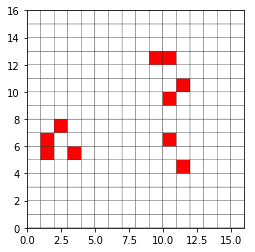

In [4]:
def plot_world(world):
    cmap = colors.ListedColormap(['white', 'red'])
    plt.pcolor(world, cmap=cmap, edgecolor="black")
    plt.axis('square')
    plt.show()
    
world = init_world() # initialize world with default conditions
plot_world(world)

Each time step is viewed as a *generation*. Transitions between generations follow the von Neumann neighborhood paradigm and are as follows:
1. Any living cell with fewer than 2 neighbors dies **(underpopulation)**
2. Any living cell with 2 or 3 neighbors lives on to the next generation
3. Any living cell with more than 3 neighbors dies **(overpopulation)**
4. Any dead cell with exactly 3 neighbors becomes a living cell **(reproduction)**

With these rules in mind, we can define a function that will take in the x and y coordinates of a cell, get its neighbors, and perform an update based on the number of living cells surrounding it. This update will be reflected in our world state variable.

As mentioned previously, our implementation of Game of Life assumes cut-off boundaries, therefore our state transition function must take this fact into account.

In [5]:
def update_cell(world, x, y):
    num_alive = 0
    current_state = world[x,y]

    #count neighbors accounting for boundaries
    x_range = range(max(x - 1, 0), min(x + 1, world.shape[0] - 1) + 1)
    y_range = range(max(y - 1, 0), min(y + 1, world.shape[1] - 1) + 1)

    #count the number of living cells in the von Neumann neighborhood of coordinates around our cell
    for cell_x, cell_y in product(x_range, y_range):
        if (not (cell_x, cell_y) == (x, y) and world[cell_x, cell_y] == ALIVE):
            num_alive += 1

    if (current_state == DEAD and not num_alive == 3):
        return DEAD
    elif (current_state == ALIVE and (num_alive < 2 or num_alive > 3)):
        return DEAD
    else:
        return ALIVE

We now have a function that 

In [7]:
def timestep(world):
    rows = world.shape[0]
    cols = world.shape[1]

    new_state = np.zeros((rows, cols), dtype=int)
    for x in range(0, rows):
        for y in range(0, cols):
            new_state[x,y] = update_cell(world, x, y)

    return new_state

note optimization/brute force, O(n^2)

Let's view an example of a timestep. First, let's generate a small enough world so that we can easily view all transitions in a timestep

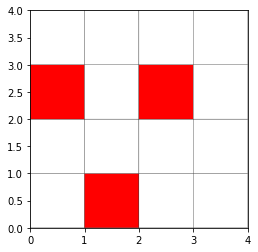

In [14]:
world = init_world(n = 4, cluster_n = 3, clusters = 2)
plot_world(world)

Boundaries






## 1.3 Analysis of Game of Life?

density plots, phase space?, transition diagrams?, cobweb plots?